In [ ]:
#Desc: twitter sentiment analysis program that parses the tweets fetched from Twitter using Python

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving login.csv to login (1).csv


In [ ]:
# get the data
log = pd.read_csv('login.csv')

In [ ]:
# Twitter API credentials
# dont understand how to get the data from login csv
# so i put the credentials in variable
consumerKey = 'FC9tkUpEaJT9CRbY2oBBSUr79'
consumerSecret = '7kGxIfkBAsQXpAXwig3Xihh4R6UWJDhk7uf40wvpD0uttKi9s3'
accessToken = '813812168348925952-o13CjpUhliLsx8RRsDxs7MBRR1PNljk'
accessTokenSecret = '4tiKOkO60jafMWQqzFXZm1J7rwPWiFKDkuzlHYyP79RGc'

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth infromation
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
# Extract 100 tweets from a twitter user
posts = api.user_timeline(screen_name = "RickandMorty", count = 100, lang = "en", tweet_mode="extended")

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1) The @adultswim live con experience is back and this time it’s v.i.r.t.u.a.l. 

Join us on the Internet July 23-25 for live events, cosplay, panels, giveaways, music &amp; surprises. It’ll be just like the real con but less sweaty &amp; more free. 

For info visit https://t.co/CjALfW1VNU https://t.co/djEzcQgQHC

2) Worms. #rickandmorty @titmouseinc https://t.co/F18HzvAmIZ

3) Watch "The Vat of Acid Episode" FREE on the @adultswim app.
https://t.co/MhxSQemfh6 https://t.co/3iRQ4IBc9l

4) Bounty. #rickandmorty https://t.co/9DbJhvo6Sd

5) RT @PocketMortys: Stack Pringles flavors to make new ones. Your Mortys will love it. @MortyBot1 @Pringles #ad https://t.co/Gz7hkcVCNJ



In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()


,Tweets
0,The @adultswim live con experience is back and...
1,Worms. #rickandmorty @titmouseinc https://t.co...
2,"Watch ""The Vat of Acid Episode"" FREE on the @a..."
3,Bounty. #rickandmorty https://t.co/9DbJhvo6Sd
4,RT @PocketMortys: Stack Pringles flavors to ma...


In [ ]:
# Clean the text from @, hashtags, retweets, url
# Create the function to clean it
def cleanTxt(text):
  # r tells python that the expression is a raw string
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mention
  text = re.sub(r'#', '', text) #Removing the hasttags
  text = re.sub(r'RT[\s]:+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Removing url or hyperlink
  text = re.sub(r'\n', '', text) #Removing the \n

  return text

# Cleaning the text
df ['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned text
df


,Tweets
0,The live con experience is back and this time...
1,Worms. rickandmorty
2,"Watch ""The Vat of Acid Episode"" FREE on the a..."
3,Bounty. rickandmorty
4,Stack Pringles flavors to make new ones. Your...
...,...
95,Wendy Morty is waiting for you. This Morty lo...
96,"Rick and Morty: Season 4 is about to return, ..."
97,"Enjoy this phone background, broh.Art by"
98,"Animation challenges, dawg. This shit is hard,..."


In [ ]:
# Create function to get the subjectivity
# subjectivity tells the feeling of the text
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
# polarity tells the positive or negative
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,The live con experience is back and this time...,0.380952,0.172294
1,Worms. rickandmorty,0.000000,0.000000
2,"Watch ""The Vat of Acid Episode"" FREE on the a...",0.800000,0.400000
3,Bounty. rickandmorty,0.000000,0.000000
4,Stack Pringles flavors to make new ones. Your...,0.527273,0.318182
...,...,...,...
95,Wendy Morty is waiting for you. This Morty lo...,0.500000,0.300000
96,"Rick and Morty: Season 4 is about to return, ...",0.750000,-0.250000
97,"Enjoy this phone background, broh.Art by",0.500000,0.400000
98,"Animation challenges, dawg. This shit is hard,...",0.670833,-0.245833


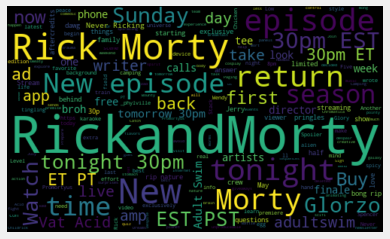

In [ ]:
# Plot the Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the DafaFrame
df

,Tweets,Subjectivity,Polarity,Analysis
0,The live con experience is back and this time...,0.380952,0.172294,Positive
1,Worms. rickandmorty,0.000000,0.000000,Neutral
2,"Watch ""The Vat of Acid Episode"" FREE on the a...",0.800000,0.400000,Positive
3,Bounty. rickandmorty,0.000000,0.000000,Neutral
4,Stack Pringles flavors to make new ones. Your...,0.527273,0.318182,Positive
...,...,...,...,...
95,Wendy Morty is waiting for you. This Morty lo...,0.500000,0.300000,Positive
96,"Rick and Morty: Season 4 is about to return, ...",0.750000,-0.250000,Negative
97,"Enjoy this phone background, broh.Art by",0.500000,0.400000,Positive
98,"Animation challenges, dawg. This shit is hard,...",0.670833,-0.245833,Negative


In [ ]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1) The  live con experience is back and this time it’s v.i.r.t.u.a.l. Join us on the Internet July 23-25 for live events, cosplay, panels, giveaways, music &amp; surprises. It’ll be just like the real con but less sweaty &amp; more free. For info visit  

2) Watch "The Vat of Acid Episode" FREE on the  app. 

3)  Stack Pringles flavors to make new ones. Your Mortys will love it.   ad 

4) Get the latest RickandMorty info in the  newsletter. Sign up here:  

5)  Despite Rick’s best efforts to control the universe, trauma sends him spiraling into despair time and time again. https:…

6) "Never Ricking Morty" is now streaming for free on the Adult Swim app:  

7) The creative team behind Childrick of Mort fields phone calls and answers your questions about spicy deleted scenes, unproduceable action sequences, and how to avoid animating pointy things. 

8) There is so much we can learn from nature. Watch Rick and Morty seasons 1-3 now streaming on  and Sundays at 11:30pm on Adult Swim. HBO

In [ ]:
# Print the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1) No more need to talk to yourself, Jerry. Catch the Season 4 RickandMorty finale tonight at 11:30pm EST/PST on . 

2) Speak to the folks behind the show with the Rick and Morty LIVE Companion Podcast, streaming Monday at 10P ET/7P PT. 

3)  Who wouldn't want a video game style play saving device? Here's your Mortys. 

4) The crew behind Promortyus answers viewer calls while discussing the intricacies of time jumps, alien facehuggers, and more!  

5) It's about time we bring back vats of toxic waste. New RickAndMorty this Sunday at 11:30pm ET/PT on  

6) Hang for a sec with our directors. Learn the process.  

7) Buy it. Buy it now. Buy the train. It is not real. Buy it ironically. Buy it seriously. Just buy it. 

8)  Some people believe the entire universe is Floaty Bloody Man's nightmare as he dies in a time-dilated reality. Here's you…

9) Co-creator Dan Harmon and writer Jeff Loveness dive into the many literal literary devices in "Never Ricking Morty" and their feelings about dis

In [ ]:
# Print the Neutral tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1) Worms. rickandmorty  

2) Bounty. rickandmorty 

3) Dreams. rickandmorty 

4) Glory to Glorzo! Watch 'Promortyus' now on the  app:  

5) Stream "Don't Look Back" now:  

6) Battle for the belt. It's the season 4 finale of RickandMorty - tomorrow at 11:30pm EST/PST on adultswim. 

7) The Rick and Morty Season Finale is this weekend. Prepare your mind with this brain-tingling quiz and your body with the stomach-tingling  breakfast menu. ad 

8) It's a comedic premise. rickandmorty aftercredits 

9)  I need a Rick and Morty in Chromatica meme to happen help

10) Dad fight. rickandmorty 

11) Now that's the camping spirit. rickandmorty  

12) rickandmorty  

13) Paging Dr. Wong. Watch the season finale of RickandMorty this Sunday at 11:30pm ET/PT on . 

14) What if Rick f**ked a planet? The Rick and Morty crew decided to explore it:  

15) This is just life in the galaxy. rickandmorty 

16) Quality family time in this one, broh.New RickandMorty tonight at 11:30pm EST/PST on . 

17) The 

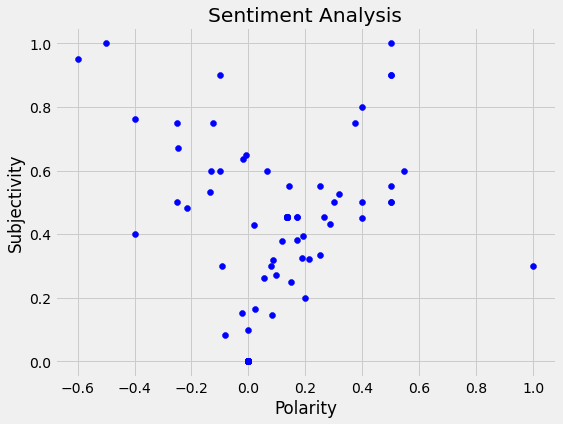

In [ ]:
# Plot the polaritty and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(    (ptweets.shape[0] / df.shape[0]) *100, 1)

48.0

In [ ]:
# Get the percentage of neutral tweets
neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['Tweets']

round(    (neutweets.shape[0] / df.shape[0]) *100, 1)

34.0

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round(    (ntweets.shape[0] / df.shape[0]) *100, 1)

18.0

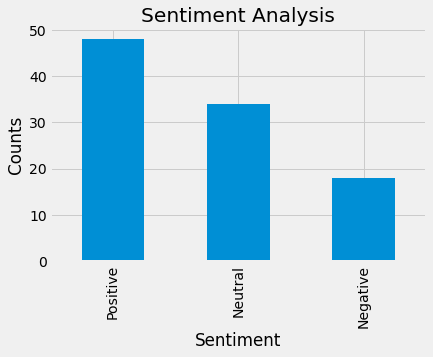

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()